<a href="https://colab.research.google.com/github/jet981217/COVID19_PREDICTION_VARIOUS_AI_COMPARISON/blob/master/COVID_19_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

ANN with Zero hidden statesRandomSearchCV 최적 파라미터: {'ANN__epochs': 284, 'ANN__first_Drop_val': 0.0035139786621697366, 'ANN__first_activator': 'tanh', 'ANN__first_l1': 0.0021502969635019365, 'ANN__first_l2': 0.0023846122369726545, 'ANN__first_neuron': 60, 'ANN__optimizer_val': 'adam'}
4/4 [==============================] - 1s 3ms/step - loss: 10094.4170 - mae: 67.8956 - mse: 10093.9619

Best score for ANN with No hidden state is:  84.10454597423184

Prediction for ANN with No hidden state is:  [[1629.9031]]

ANN with No hidden states Mae score for Test is:  67.8956069946289

ANN with No hidden states Rmse score for Test is:  100.46871111974365


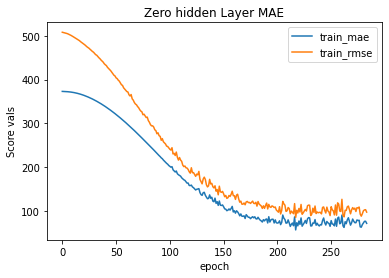


ANN with One hidden states RandomSearchCV 최적 파라미터: {'ANN_1__epochs': 375, 'ANN_1__first_Drop_val': 0.030575172694505992, 'ANN_1__first_activator': 'tanh', 'ANN_1__first_l1': 0.001511094083575932, 'ANN_1__first_l2': 0.0015578408958483118, 'ANN_1__first_neuron': 38, 'ANN_1__optimizer_val': 'rmsprop', 'ANN_1__second_Drop_val': 0.11250313547688959, 'ANN_1__second_activator': 'tanh', 'ANN_1__second_l1': 0.0005162383755595732, 'ANN_1__second_l2': 0.0008032309487893514, 'ANN_1__second_neuron': 50}
4/4 [==============================] - 0s 3ms/step - loss: 10096.5557 - mae: 66.9841 - mse: 10096.2207

Best score for ANN with One hidden state is:  87.35226440464716

Prediction for ANN with One hidden state is:  [[1561.441]]

ANN with One hidden states Mae score for Test is:  66.98407745361328

ANN with One hidden states Rmse score for Test is:  100.47995174722666


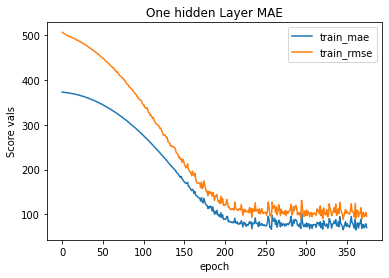


DNN with Two hidden states RandomSearchCV 최적 파라미터: {'DNN_2__epochs': 388, 'DNN_2__first_Drop_val': 0.17790927650005617, 'DNN_2__first_activator': 'sigmoid', 'DNN_2__first_l1': 0.0014033347195296253, 'DNN_2__first_l2': 0.0018298337037737891, 'DNN_2__first_neuron': 48, 'DNN_2__optimizer_val': 'adam', 'DNN_2__second_Drop_val': 0.11966641622065945, 'DNN_2__second_activator': 'sigmoid', 'DNN_2__second_l1': 0.0025287854943935447, 'DNN_2__second_l2': 0.000143326424891264, 'DNN_2__second_neuron': 54, 'DNN_2__third_Drop_val': 0.16797038783576151, 'DNN_2__third_activator': 'tanh', 'DNN_2__third_l1': 9.721989413913335e-06, 'DNN_2__third_l2': 0.0012427637389420105, 'DNN_2__third_neuron': 61}
4/4 [==============================] - 0s 3ms/step - loss: 7843.6982 - mae: 60.5218 - mse: 7841.2964

Best score for DNN with Two hidden state is:  85.26099451162933

Prediction for DNN with Two hidden state is:  [[1572.0747]]

DNN with Two hidden states Mae score for Test is:  60.521785736083984

DNN with Tw

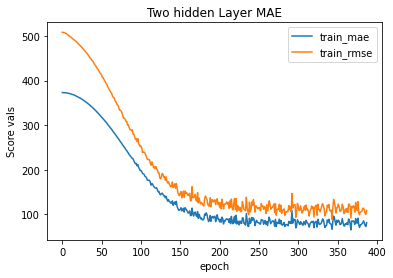


DNN with Three hidden states RandomSearchCV 최적 파라미터: {'DNN_3__epochs': 379, 'DNN_3__first_Drop_val': 0.17950112422437606, 'DNN_3__first_activator': 'tanh', 'DNN_3__first_l1': 0.0008618657320748152, 'DNN_3__first_l2': 0.0007316261047892623, 'DNN_3__first_neuron': 31, 'DNN_3__fourth_Drop_val': 0.19423181291014968, 'DNN_3__fourth_activator': 'tanh', 'DNN_3__fourth_l1': 0.0011588580294421501, 'DNN_3__fourth_l2': 0.0013283044883706447, 'DNN_3__fourth_neuron': 53, 'DNN_3__optimizer_val': 'adam', 'DNN_3__second_Drop_val': 0.03754832644334753, 'DNN_3__second_activator': 'sigmoid', 'DNN_3__second_l1': 0.0020718759400056175, 'DNN_3__second_l2': 0.0001327629892828127, 'DNN_3__second_neuron': 33, 'DNN_3__third_Drop_val': 0.08964587764957556, 'DNN_3__third_activator': 'tanh', 'DNN_3__third_l1': 0.00046151748879848156, 'DNN_3__third_l2': 0.0016956544476421495, 'DNN_3__third_neuron': 33}
4/4 [==============================] - 1s 4ms/step - loss: 12331.7666 - mae: 74.4389 - mse: 12331.0459

Best scor

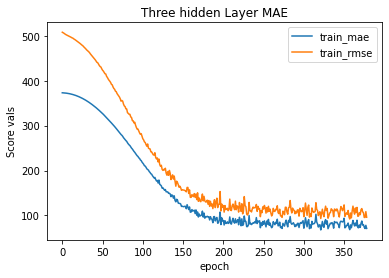

In [ ]:
#Prediction task
"""
!pip install pandas
!pip install requests
!pip install scikit-learn
""" 
import keras
import codecs
import io
import sklearn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from keras import regularizers
import math
from scipy.stats import uniform, randint
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
import requests
from sklearn.linear_model import LinearRegression
 
#ANN with no hidden layers
def Model_Build_Zero_Hidden(first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2), activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))  
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#ANN with one hidden layers
def Model_Build_One_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#DNN with two hidden layers 
def Model_Build_Two_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, third_Drop_val, third_neuron, third_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2, third_l1, third_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #second hidden state
  Model.add(layers.Dense(third_neuron, kernel_regularizer=regularizers.l1_l2(l1=third_l1, l2=third_l2),activation = third_activator))
  Model.add(keras.layers.Dropout(third_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#DNN with three hidden layers 
def Model_Build_Three_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, third_Drop_val, third_neuron, third_activator, fourth_Drop_val, fourth_neuron, fourth_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2, third_l1, third_l2, fourth_l1, fourth_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #second hidden state
  Model.add(layers.Dense(third_neuron, kernel_regularizer=regularizers.l1_l2(l1=third_l1, l2=third_l2),activation = third_activator))
  Model.add(keras.layers.Dropout(third_Drop_val)) 
  Model.add(BatchNormalization())
  #third hidden state
  Model.add(layers.Dense(fourth_neuron, kernel_regularizer=regularizers.l1_l2(l1=fourth_l1, l2=fourth_l2),activation = fourth_activator))
  Model.add(keras.layers.Dropout(fourth_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model 
 
#Accessing to Datas
drive.mount('/content/drive')
 
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/THISWEEK_DATA.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/NEXTWEEK_AVG_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
target = tr.to_numpy()
 
#Data spilted to Train and Test. This is only for Polynomial, ANN and DNNs
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2)
 
mean  = train_input.mean(axis=0)
 
 
#하이퍼파라미터 튜닝이 끝나고 마지막 training을 위해 정규화
"""
train_input_forlast = train_input.astype('float64')
last_mean = train_input_forlast.mean(axis=0)
train_input_forlast -=last_mean
#train_input_forlast -=mean
std = train_input_forlast.std(axis=0)
train_input_forlast /= std
 
NUM_CHECK_INPUT =[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]
#NUM_CHECK_INPUT =[1629,1486,1318,1365,1896,1674,1710]
NUM_CHECK_INPUT = np.array(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.astype('float64')
NUM_CHECK_INPUT -= mean
NUM_CHECK_INPUT /= std
#NUM_CHECK_INPUT = np.reshape(NUM_CHECK_INPUT, (1,7))
NUM_CHECK_INPUT = np.reshape(NUM_CHECK_INPUT, (1,21))
 
test_input = test_input.astype('float64')
test_input -= mean
test_input /= std
"""
 
train_input_forlast = train_input.astype('float64')
train_input_forlast_scaler = MaxAbsScaler()
train_input_forlast = train_input_forlast_scaler.fit_transform(train_input_forlast)
"""
train_target_forlast = train_target.astype('float64')
train_target_forlast_scaler = MaxAbsScaler()
train_target_forlast = train_target_forlast_scaler.fit_transform(train_target_forlast)
"""
test_input = test_input.astype('float64')
test_input = train_input_forlast_scaler.fit_transform(test_input)
"""
test_target = test_target.astype('float64')
test_target = train_target_forlast_scaler.fit_transform(test_target)
 
train_target = train_target.astype('float64')
train_target_scaler  = MaxAbsScaler()
train_target = train_target_scaler.fit_transform(train_target)
""" 
 
NUM_CHECK_INPUT =[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]
NUM_CHECK_INPUT = np.array(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.astype('float64')
NUM_CHECK_INPUT = np.reshape(NUM_CHECK_INPUT, (1,21))
NUM_CHECK_INPUT = train_input_forlast_scaler.transform(NUM_CHECK_INPUT)
 
#ANN_with no hidden layer
regressor_Zero = KerasRegressor(build_fn = Model_Build_Zero_Hidden, verbose=0)
pipe_Zero = Pipeline([('scaler', MaxAbsScaler()), ('ANN', regressor_Zero)])
 
params = {'ANN__first_Drop_val': uniform(0,0.3),
          'ANN__first_neuron': randint(10,64),
          'ANN__first_activator': ['tanh','sigmoid'],
          'ANN__optimizer_val' : ['adam','rmsprop'],
          'ANN__first_l1' : uniform(0,0.003),
          'ANN__first_l2' : uniform(0,0.003),
          'ANN__epochs' : randint(250,400),
          }
 
grid_Zero = RandomizedSearchCV(pipe_Zero, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_Zero.fit(train_input, train_target)
 
 
print('\nANN with Zero hidden state''sRandomSearchCV 최적 파라미터:', grid_Zero.best_params_)
 
Model_Zero = Model_Build_Zero_Hidden(grid_Zero.best_params_.get('ANN__first_Drop_val'), grid_Zero.best_params_.get('ANN__first_neuron'), grid_Zero.best_params_.get('ANN__first_activator'), grid_Zero.best_params_.get('ANN__optimizer_val'), grid_Zero.best_params_.get('ANN__first_l1'), grid_Zero.best_params_.get('ANN__first_l2'))
history_Zero = Model_Zero.fit(train_input_forlast, train_target, epochs= grid_Zero.best_params_.get('ANN__epochs'), verbose=0)
 
Model_Zero_mse_score, Model_Zero_mae_score, Model_Zero_rmse_score= Model_Zero.evaluate(test_input, test_target)
 
print('\nBest score for ANN with No hidden state is: ', math.sqrt(-1*grid_Zero.best_score_))
print('\nPrediction for ANN with No hidden state is: ', Model_Zero.predict([NUM_CHECK_INPUT]))
print('\nANN with No hidden state''s Mae score for Test is: ',Model_Zero_mae_score)
print('\nANN with No hidden state''s Rmse score for Test is: ',math.sqrt(Model_Zero_rmse_score))
 
plt.title("Zero hidden Layer MAE")
plt.plot(history_Zero.history['mae'])
plt.plot(np.sqrt(history_Zero.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
 
 
#ANN with 1 hidden layers
regressor_One = KerasRegressor(build_fn = Model_Build_One_Hidden, verbose=0)
pipe_One = Pipeline([('scaler', MaxAbsScaler()), ('ANN_1', regressor_One)])
 
params = {'ANN_1__first_Drop_val': uniform(0,0.3),
          'ANN_1__first_neuron': randint(10,64),
          'ANN_1__first_activator': ['tanh','sigmoid'],
          'ANN_1__second_Drop_val': uniform(0,0.3),
          'ANN_1__second_neuron': randint(10,64),
          'ANN_1__second_activator': ['tanh','sigmoid'],
          'ANN_1__optimizer_val' : ['adam','rmsprop'],
          'ANN_1__first_l1' : uniform(0,0.003),
          'ANN_1__first_l2' : uniform(0,0.003), 
          'ANN_1__second_l1' : uniform(0,0.003),
          'ANN_1__second_l2' : uniform(0,0.003),
          'ANN_1__epochs' : randint(250,400),
          }
 
grid_One = RandomizedSearchCV(pipe_One,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_One.fit(train_input, train_target)
 
print('\nANN with One hidden state''s RandomSearchCV 최적 파라미터:', grid_One.best_params_)
 
Model_One = Model_Build_One_Hidden(grid_One.best_params_.get('ANN_1__first_Drop_val'), grid_One.best_params_.get('ANN_1__first_neuron'), grid_One.best_params_.get('ANN_1__first_activator'), grid_One.best_params_.get('ANN_1__second_Drop_val'), grid_One.best_params_.get('ANN_1__second_neuron'), grid_One.best_params_.get('ANN_1__second_activator'), grid_One.best_params_.get('ANN_1__optimizer_val'), grid_One.best_params_.get('ANN_1__first_l1'), grid_One.best_params_.get('ANN_1__first_l2'), grid_One.best_params_.get('ANN_1__second_l1'), grid_One.best_params_.get('ANN_1__second_l2'))
history_One = Model_One.fit(train_input_forlast, train_target, epochs=grid_One.best_params_.get('ANN_1__epochs'), verbose=0)
 
Model_One_mse_score, Model_One_mae_score, Model_One_rmse_score = Model_One.evaluate(test_input, test_target)
 
print('\nBest score for ANN with One hidden state is: ', math.sqrt(-1*grid_One.best_score_))
print('\nPrediction for ANN with One hidden state is: ', Model_One.predict([NUM_CHECK_INPUT]))
print('\nANN with One hidden state''s Mae score for Test is: ',Model_One_mae_score)
print('\nANN with One hidden state''s Rmse score for Test is: ',math.sqrt(Model_One_rmse_score))
 
plt.title("One hidden Layer MAE")
plt.plot(history_One.history['mae'])
plt.plot(np.sqrt(history_One.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
 
 
 
 
#DNN with 2 hidden layers
 
regressor_Two = KerasRegressor(build_fn = Model_Build_Two_Hidden, verbose=0)
pipe_Two = Pipeline([('scaler', MaxAbsScaler()), ('DNN_2', regressor_Two)])
 
params = {'DNN_2__first_Drop_val': uniform(0,0.3),
          'DNN_2__first_neuron': randint(10,64),
          'DNN_2__first_activator': ['tanh','sigmoid'],
          'DNN_2__second_Drop_val': uniform(0,0.3),
          'DNN_2__second_neuron': randint(10,64),
          'DNN_2__second_activator': ['tanh','sigmoid'],
          'DNN_2__third_Drop_val': uniform(0,0.3),
          'DNN_2__third_neuron': randint(10,64),
          'DNN_2__third_activator': ['tanh','sigmoid'],
          'DNN_2__optimizer_val' : ['adam','rmsprop'],
          'DNN_2__first_l1' : uniform(0,0.003),
          'DNN_2__first_l2' : uniform(0,0.003), 
          'DNN_2__second_l1' : uniform(0,0.003),
          'DNN_2__second_l2' : uniform(0,0.003),
          'DNN_2__third_l1' : uniform(0,0.003),
          'DNN_2__third_l2' : uniform(0,0.003),
          'DNN_2__epochs' : randint(250,400),      
          }
 
grid_Two = RandomizedSearchCV(pipe_Two,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_Two.fit(train_input, train_target)
 
print('\nDNN with Two hidden state''s RandomSearchCV 최적 파라미터:', grid_Two.best_params_)
 
Model_Two = Model_Build_Two_Hidden(grid_Two.best_params_.get('DNN_2__first_Drop_val'), grid_Two.best_params_.get('DNN_2__first_neuron'), grid_Two.best_params_.get('DNN_2__first_activator'), grid_Two.best_params_.get('DNN_2__second_Drop_val'), grid_Two.best_params_.get('DNN_2__second_neuron'), grid_Two.best_params_.get('DNN_2__second_activator'), grid_Two.best_params_.get('DNN_2__third_Drop_val'), grid_Two.best_params_.get('DNN_2__third_neuron'), grid_Two.best_params_.get('DNN_2__third_activator'), grid_Two.best_params_.get('DNN_2__optimizer_val'), grid_Two.best_params_.get('DNN_2__first_l1'), grid_Two.best_params_.get('DNN_2__first_l2'), grid_Two.best_params_.get('DNN_2__second_l1'), grid_Two.best_params_.get('DNN_2__second_l2'), grid_Two.best_params_.get('DNN_2__third_l1'), grid_Two.best_params_.get('DNN_2__third_l2'))
history_Two = Model_Two.fit(train_input_forlast, train_target, epochs=grid_Two.best_params_.get('DNN_2__epochs'), verbose=0)
 
Model_Two_mse_score, Model_Two_mae_score, Model_Two_mse_score = Model_Two.evaluate(test_input, test_target)
 
print('\nBest score for DNN with Two hidden state is: ', math.sqrt(-1*grid_Two.best_score_))
print('\nPrediction for DNN with Two hidden state is: ', Model_Two.predict([NUM_CHECK_INPUT]))
print('\nDNN with Two hidden state''s Mae score for Test is: ',Model_Two_mae_score)
print('\nDNN with Two hidden state''s Rmse score for Test is: ',math.sqrt(Model_Two_mse_score))
 
plt.title("Two hidden Layer MAE")
plt.plot(history_Two.history['mae'])
plt.plot(np.sqrt(history_Two.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()
 
 
 
 
#DNN with 3 hidden layers
 
regressor_Three = KerasRegressor(build_fn = Model_Build_Three_Hidden, verbose=0)
pipe_Three = Pipeline([('scaler', MaxAbsScaler()), ('DNN_3', regressor_Three)])
 
params = {'DNN_3__first_Drop_val': uniform(0,0.3),
          'DNN_3__first_neuron': randint(10,64),
          'DNN_3__first_activator': ['tanh','sigmoid'],
          'DNN_3__second_Drop_val': uniform(0,0.3),
          'DNN_3__second_neuron': randint(10,64),
          'DNN_3__second_activator': ['tanh','sigmoid'],
          'DNN_3__third_Drop_val': uniform(0,0.3),
          'DNN_3__third_neuron': randint(10,64),
          'DNN_3__third_activator': ['tanh','sigmoid'],
          'DNN_3__fourth_Drop_val': uniform(0,0.3),
          'DNN_3__fourth_neuron': randint(10,64),
          'DNN_3__fourth_activator': ['tanh','sigmoid'],          
          'DNN_3__optimizer_val' : ['adam','rmsprop'],
          'DNN_3__first_l1' : uniform(0,0.003),
          'DNN_3__first_l2' : uniform(0,0.003), 
          'DNN_3__second_l1' : uniform(0,0.003),
          'DNN_3__second_l2' : uniform(0,0.003),
          'DNN_3__third_l1' : uniform(0,0.003),
          'DNN_3__third_l2' : uniform(0,0.003),
          'DNN_3__fourth_l1' : uniform(0,0.003),
          'DNN_3__fourth_l2' : uniform(0,0.003),          
          'DNN_3__epochs' : randint(250,400),      
          }
 
grid_Three = RandomizedSearchCV(pipe_Three,param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, verbose=0)
 
grid_Three.fit(train_input, train_target)
 
print('\nDNN with Three hidden state''s RandomSearchCV 최적 파라미터:', grid_Three.best_params_)
 
Model_Three = Model_Build_Three_Hidden(grid_Three.best_params_.get('DNN_3__first_Drop_val'), grid_Three.best_params_.get('DNN_3__first_neuron'), grid_Three.best_params_.get('DNN_3__first_activator'), grid_Three.best_params_.get('DNN_3__second_Drop_val'), grid_Three.best_params_.get('DNN_3__second_neuron'), grid_Three.best_params_.get('DNN_3__second_activator'), grid_Three.best_params_.get('DNN_3__third_Drop_val'), grid_Three.best_params_.get('DNN_3__third_neuron'), grid_Three.best_params_.get('DNN_3__third_activator'), grid_Three.best_params_.get('DNN_3__fourth_Drop_val'), grid_Three.best_params_.get('DNN_3__fourth_neuron'), grid_Three.best_params_.get('DNN_3__fourth_activator'), grid_Three.best_params_.get('DNN_3__optimizer_val'),grid_Three.best_params_.get('DNN_3__first_l1'), grid_Three.best_params_.get('DNN_3__first_l2'), grid_Three.best_params_.get('DNN_3__second_l1'), grid_Three.best_params_.get('DNN_3__second_l2'), grid_Three.best_params_.get('DNN_3__third_l1'), grid_Three.best_params_.get('DNN_3__third_l2'), grid_Three.best_params_.get('DNN_3__fourth_l1'), grid_Three.best_params_.get('DNN_3__fourth_l2'))
history_Three = Model_Three.fit(train_input_forlast, train_target, epochs=grid_Three.best_params_.get('DNN_3__epochs'), verbose=0)
 
Model_Three_mse_score, Model_Three_mae_score, Model_Three_mse_score = Model_Three.evaluate(test_input, test_target)
 
print('\nBest score for DNN with Three hidden state is: ', math.sqrt(-1*grid_Three.best_score_))
print('\nPrediction for DNN with Three hidden state is: ', Model_Three.predict([NUM_CHECK_INPUT]))
print('\nDNN with Three hidden state''s Mae score for Test is: ',Model_Three_mae_score)
print('\nDNN with Three hidden state''s Rmse score for Test is: ',math.sqrt(Model_Three_mse_score))
 
plt.title("Three hidden Layer MAE")
plt.plot(history_Three.history['mae'])
plt.plot(np.sqrt(history_Three.history['mse']))
plt.xlabel('epoch')
plt.ylabel('Score vals')
plt.legend(['train_mae', 'train_rmse'])
plt.show()

In [ ]:
#키워드 분류 Daily
!pip install pandas
!pip install requests
#!pip install kreas
!pip install scikit-learn
!pip install tensorflow

import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
#from tensorflow import kreas
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import requests
import re
#from tensorflow import kreas
import os
from google.colab import drive


def File_Access(File_To_Write, poslist, neglist, path, file_name,temp):
  c = path + "/" + file_name
  
  news_labels = pd.read_csv(c)
  news_labels.head()
  news_labels.to_numpy()
  sum = 0
  for member in Tag_Search(poslist, neglist, news_labels):
    sum += member
  if temp == 0:
      File_To_Write.write(str(sum)+"\n")
  else:
      File_To_Write.write(str(sum))
  
  return sum

def Tag_Search(poslist, neglist, lists):
  label_lists = []
  for names in lists:
    temp_label = 0
    sub_names = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', names)
    is_positive = False
    is_negative = False

    for positive_words in poslist:
      if sub_names.find(positive_words) == 1:
        is_positive = True
        break
    for negative_words in neglist:
      if sub_names.find(negative_words) == 1:
        is_negative = True
        break
    
    if (is_positive == False and is_negative == False):
      temp_label = 0
    if is_positive == True:
      temp_label = 1
    elif is_negative == True:
      temp_label = -1

    label_lists.append(temp_label)
  
  return label_lists
    


drive.mount('/content/drive')

path = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA"
file_list = os.listdir(path)

#긍정부정 라벨링
poslist = []
neglist = []
#긍정 단어들
positive = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/positive.csv", 'rb', encoding='UTF-8')

while True:
  ln = positive.readline()
  ln = ln.replace('\n','')
  poslist.append(ln)
  if not ln: break
#부정 단어들
neagative = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/negative.csv", 'rb', encoding='UTF-8')

while True:
  ln = neagative.readline()
  ln = ln.replace('\n','')
  neglist.append(ln)
  if not ln: break

c = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Crwal_Label/LABEL_DATA_DAILY.csv"
  
f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)


for file in file_list:
  temp = 0
  if file is file_list[-1]:
    temp = 1
  
  File_Access(f, poslist, neglist, path, file,temp)

f.close()
#dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/COVID_ADDED.csv")
#dt.head()

 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Crwaling
!pip install Selenium
!pip install requests
!apt-get update 
 
!apt install chromium-chromedriver
 
from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime
import requests
 
chrome_options = webdriver.ChromeOptions()
 
chrome_options.add_argument('--headless') 
 
chrome_options.add_argument('--no-sandbox')
 
chrome_options.add_argument('--disable-dev-shm-usage')
 
 
def Crwal_Data(Year, Month, Day):
  lists = []
  for i in range(0, 30):
    Call_Vals(Year, Month, Day, i*10+1, lists)
 
  print(lists)
  return lists
 
def Call_Vals(Year, Month, Day, n, lists):
  c = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%98&sort=0&photo=0&field=0&pd=3&ds=' + str(Year) + '.' + str(Month) + '.' + Day+ '&de=' + str(Year) + '.' + str(Month) + '.' + str(Day)+ '&cluster_rank=48&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from'+ str(Year) + str(Month) + str(Day) +'to'+ str(Year) + str(Month) + str(Day) +',a:all&start='+str(n)
  request = requests.get(c)
  html = request.text
  soup = BeautifulSoup(html, 'html.parser')
 
  # select 과정
  links = soup.select('#main_pack > section.sc_new.sp_nnews._prs_nws > div > div.group_news > ul.list_news')
 
  for article in links:
    a_tag = article.select('div.news_wrap.api_ani_send > div.news_area > a')
    for temp_tag in a_tag:
      lists.append(temp_tag['title'])
  
def Write_File(Year, Month, Day, File_Pos):
  c = File_Pos + str(Year) + str(Month) + Day+".txt"
  
  f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)#새파일생성할거임매일
  lists = Crwal_Data(str(Year), str(Month), Day)
  f.write(','.join(lists))
  #print(f.read())
  f.close()
"""
for Day in range(21, 29) :
  Write_File('2020', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 31) :
  Write_File('2020', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 30) :
  Write_File('2020', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 31) :
  Write_File('2020', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 30) :
  Write_File('2020', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 31) :
  Write_File('2020', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
 
Write_File('2020', '02', '29', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '03', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '04', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '05', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '06', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '07', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""
"""
for Day in range(19, 32) :
  Write_File('2020', '08', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 31) :
  Write_File('2020', '09', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 32) :
  Write_File('2020', '10', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 31) :
  Write_File('2020', '11', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 32) :
  Write_File('2020', '12', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 32) :
  Write_File('2021', '01', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(28, 29) :
  Write_File('2021', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 32) :
  Write_File('2021', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 31) :
  Write_File('2021', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 32) :
  Write_File('2021', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 31) :
  Write_File('2021', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
for Day in range(1, 28) :
  Write_File('2021', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
 
#Write_File('2021', '07', '07', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""
 
Write_File('2021', '07', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
for Day in range(1, 4) :
  Write_File('2021', '08', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

     |████████████████████████████████| 904 kB 13.3 MB/s 
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ub

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 CNN_LSTM  RandomSearchCV best parameter:  {'CNN_LSTM__CNN_MaxPoolval': 1, 'CNN_LSTM__CNN_Window_size': 2, 'CNN_LSTM__CNN_activation': 'tanh', 'CNN_LSTM__CNN_neuron': 99, 'CNN_LSTM__epochs': 10, 'CNN_LSTM__first_Drop_val': 0.021815410524031256, 'CNN_LSTM__first_activator': 'tanh', 'CNN_LSTM__first_l1': 0.028970870570159436, 'CNN_LSTM__first_l2': 0.004865054372992561, 'CNN_LSTM__first_neuron': 97, 'CNN_LSTM__first_recurrent_Drop_val': 0.3180690887924673, 'CNN_LSTM__optimizer_val': 'adam'} 

3/3 [==============================] - 1s 5ms/step - loss: 0.2869 - mae: 0.0713 - mse: 0.0091

Best score for  CNN_LSTM  is:  [[105.54496622]]

 CNN_LSTM  Mae score for Test is:  [[113.73002483]]

 CNN_LSTM  Rmse score for Test is:  [[151.96272768]]


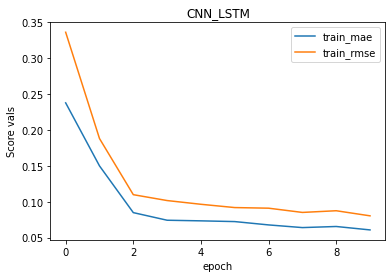



 CNN_GRU  RandomSearchCV best parameter:  {'CNN_GRU__CNN_MaxPoolval': 2, 'CNN_GRU__CNN_Window_size': 3, 'CNN_GRU__CNN_activation': 'tanh', 'CNN_GRU__CNN_neuron': 70, 'CNN_GRU__epochs': 34, 'CNN_GRU__first_Drop_val': 0.003992613045825699, 'CNN_GRU__first_activator': 'sigmoid', 'CNN_GRU__first_l1': 0.0791735267100659, 'CNN_GRU__first_l2': 0.0626219397377432, 'CNN_GRU__first_neuron': 112, 'CNN_GRU__first_recurrent_Drop_val': 0.5714644400254871, 'CNN_GRU__optimizer_val': 'rmsprop'} 

3/3 [==============================] - 1s 6ms/step - loss: 1.5014 - mae: 0.0750 - mse: 0.0109

Best score for  CNN_GRU  is:  [[96.82435116]]

 CNN_GRU  Mae score for Test is:  [[119.5298508]]

 CNN_GRU  Rmse score for Test is:  [[166.71622627]]


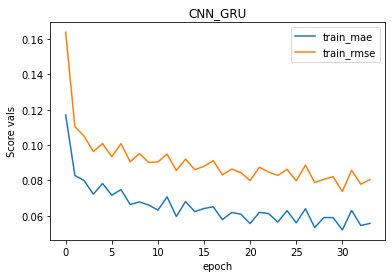

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning




 LSTM_LSTM  RandomSearchCV best parameter:  {'LSTM_LSTM__epochs': 13, 'LSTM_LSTM__first_Drop_val': 0.020569390843981364, 'LSTM_LSTM__first_activator': 'tanh', 'LSTM_LSTM__first_l1': 0.06252563745935004, 'LSTM_LSTM__first_l2': 0.047650325936517, 'LSTM_LSTM__first_neuron': 88, 'LSTM_LSTM__first_recurrent_Drop_val': 0.37222006118990725, 'LSTM_LSTM__optimizer_val': 'adam', 'LSTM_LSTM__second_Drop_val': 0.014370480745240645, 'LSTM_LSTM__second_activator': 'sigmoid', 'LSTM_LSTM__second_l1': 0.0016368725012077757, 'LSTM_LSTM__second_l2': 0.056061755556799056, 'LSTM_LSTM__second_neuron': 70, 'LSTM_LSTM__second_recurrent_Drop_val': 0.29501471662465706} 

3/3 [==============================] - 2s 9ms/step - loss: 0.3561 - mae: 0.0734 - mse: 0.0100

Best score for  LSTM_LSTM  is:  [[105.10972217]]

 LSTM_LSTM  Mae score for Test is:  [[117.03754175]]

 LSTM_LSTM  Rmse score for Test is:  [[159.61975732]]


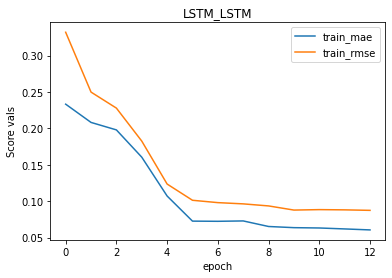



 GRU_GRU  RandomSearchCV best parameter:  {'GRU_GRU__epochs': 17, 'GRU_GRU__first_Drop_val': 0.02986462172703156, 'GRU_GRU__first_activator': 'tanh', 'GRU_GRU__first_l1': 0.024508545580670983, 'GRU_GRU__first_l2': 0.02222943419834944, 'GRU_GRU__first_neuron': 71, 'GRU_GRU__first_recurrent_Drop_val': 0.3581119603900125, 'GRU_GRU__optimizer_val': 'rmsprop', 'GRU_GRU__second_Drop_val': 0.04885408127391808, 'GRU_GRU__second_activator': 'sigmoid', 'GRU_GRU__second_l1': 0.011232582462401365, 'GRU_GRU__second_l2': 0.014013174715046851, 'GRU_GRU__second_neuron': 96, 'GRU_GRU__second_recurrent_Drop_val': 0.2638912193492907} 

3/3 [==============================] - 2s 8ms/step - loss: 0.3504 - mae: 0.0637 - mse: 0.0071

Best score for  GRU_GRU  is:  [[93.77629409]]

 GRU_GRU  Mae score for Test is:  [[101.59417319]]

 GRU_GRU  Rmse score for Test is:  [[134.7318244]]


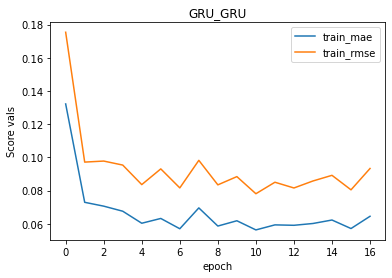



 LSTM_GRU  RandomSearchCV best parameter:  {'LSTM_GRU__epochs': 12, 'LSTM_GRU__first_Drop_val': 0.057250783219490536, 'LSTM_GRU__first_activator': 'sigmoid', 'LSTM_GRU__first_l1': 0.0777963359104269, 'LSTM_GRU__first_l2': 0.06260884267820985, 'LSTM_GRU__first_neuron': 127, 'LSTM_GRU__first_recurrent_Drop_val': 0.15825078124967282, 'LSTM_GRU__optimizer_val': 'rmsprop', 'LSTM_GRU__second_Drop_val': 0.08538986159245482, 'LSTM_GRU__second_activator': 'sigmoid', 'LSTM_GRU__second_l1': 0.07494321544502791, 'LSTM_GRU__second_l2': 0.0634242481294046, 'LSTM_GRU__second_neuron': 126, 'LSTM_GRU__second_recurrent_Drop_val': 0.5386305967137845} 

3/3 [==============================] - 2s 8ms/step - loss: 4.3249 - mae: 0.0800 - mse: 0.0125

Best score for  LSTM_GRU  is:  [[93.9980258]]

 LSTM_GRU  Mae score for Test is:  [[127.50625636]]

 LSTM_GRU  Rmse score for Test is:  [[178.0677435]]


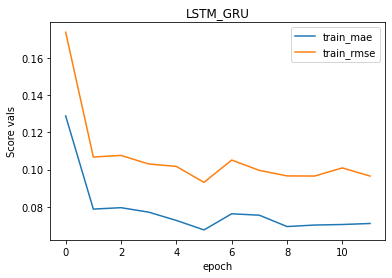

,VALIDATION_RMSE,TEST_MAE,TEST_RMSE
ANN,NaN,NaN,NaN
ANN_1,NaN,NaN,NaN
DNN_2,NaN,NaN,NaN
DNN_3,NaN,NaN,NaN
RNN,NaN,NaN,NaN
LSTM,NaN,NaN,NaN
GRU,NaN,NaN,NaN
LSTM_PLUS_DENSE,NaN,NaN,NaN
GRU_PLUS_DENSE,NaN,NaN,NaN
CNN_LSTM,105.544966,113.730025,151.962728


In [ ]:
 
#Forecasting
"""
!pip install pandas
!pip install requests
!pip install scikit-learn
""" 
import keras
import codecs
import io
import sklearn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from keras import regularizers
import math
from scipy.stats import uniform, randint
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
import requests
from sklearn.linear_model import LinearRegression
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras.layers import SimpleRNN
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.model_selection import ParameterSampler
from keras.layers import Reshape
from sklearn.model_selection import TimeSeriesSplit
from IPython.display import display
 
#Accessing to Data
drive.mount('/content/drive')
 
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/THISWEEK_DATA.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/NEXTWEEK_AVG_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
 
 
 
target = tr.to_numpy()
 
 
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.15, shuffle = False)
#, shuffle = False
train_input = train_input.astype('float64')
 
 
#Cannot mix Data/Test when dealing with LSTM
#So I set shuffle to FALSE
 
 
 
 
# return_state=True
     
train_input_forlast = train_input.astype('float64')
train_input_forlast_scaler = MaxAbsScaler()
train_input_forlast = train_input_forlast_scaler.fit_transform(train_input_forlast)
train_input_forlast_ANN = train_input_forlast
train_input_forlast = train_input_forlast.reshape(-1,7,3)
 
train_target_forlast = train_target.astype('float64')
train_target_forlast_scaler = MaxAbsScaler()
train_target_forlast = train_target_forlast_scaler.fit_transform(train_target_forlast)
train_target_forlast_ANN = train_target_forlast
 
test_input = test_input.astype('float64')
test_input = train_input_forlast_scaler.fit_transform(test_input)
test_input_ANN = test_input
test_input = test_input.reshape(-1,7,3)
 
 
test_target = test_target.astype('float64')
test_target = train_target_forlast_scaler.fit_transform(test_target)
test_target_ANN = test_target
 
train_target = train_target.astype('float64')
train_target_scaler  = MaxAbsScaler()
train_target = train_target_scaler.fit_transform(train_target)
train_target_ANN = train_target
 
train_input_ANN = train_input
 
 
 
 
#ANN with no hidden layers
def Model_Build_Zero_Hidden(first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2), activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))  
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#ANN with one hidden layers
def Model_Build_One_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#DNN with two hidden layers 
def Model_Build_Two_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, third_Drop_val, third_neuron, third_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2, third_l1, third_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #second hidden state
  Model.add(layers.Dense(third_neuron, kernel_regularizer=regularizers.l1_l2(l1=third_l1, l2=third_l2),activation = third_activator))
  Model.add(keras.layers.Dropout(third_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
#DNN with three hidden layers 
def Model_Build_Three_Hidden(first_Drop_val, first_neuron, first_activator, second_Drop_val, second_neuron, second_activator, third_Drop_val, third_neuron, third_activator, fourth_Drop_val, fourth_neuron, fourth_activator, optimizer_val, first_l1, first_l2, second_l1, second_l2, third_l1, third_l2, fourth_l1, fourth_l2):
  Model = models.Sequential()
  #입력층
  Model.add(layers.Dense(first_neuron, kernel_regularizer=regularizers.l1_l2(l1=first_l1, l2=first_l2),activation = first_activator, input_shape=(train_input.shape[1],)))
  Model.add(keras.layers.Dropout(first_Drop_val))
  Model.add(BatchNormalization())
  #fist hidden state
  Model.add(layers.Dense(second_neuron, kernel_regularizer=regularizers.l1_l2(l1=second_l1, l2=second_l2),activation = second_activator))
  Model.add(keras.layers.Dropout(second_Drop_val)) 
  Model.add(BatchNormalization())
  #second hidden state
  Model.add(layers.Dense(third_neuron, kernel_regularizer=regularizers.l1_l2(l1=third_l1, l2=third_l2),activation = third_activator))
  Model.add(keras.layers.Dropout(third_Drop_val)) 
  Model.add(BatchNormalization())
  #third hidden state
  Model.add(layers.Dense(fourth_neuron, kernel_regularizer=regularizers.l1_l2(l1=fourth_l1, l2=fourth_l2),activation = fourth_activator))
  Model.add(keras.layers.Dropout(fourth_Drop_val)) 
  Model.add(BatchNormalization())
  #출력층
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model 
 
def Model_Build_With_RNN(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(SimpleRNN(first_neuron, activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))
 
  #출력층
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
def Model_Build_With_LSTM(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(LSTM(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))
 
  #출력층
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
def Model_Build_With_GRU(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(GRU(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))
 
  #출력층
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
def Model_Build_With_LSTM_plus_Dense(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2, Dense_first_neuron, Dense_first_Drop_val, Dense_first_activator, Dense_first_l1, Dense_first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(LSTM(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))
 
  #출력층
 
  Model.add(layers.Dense(Dense_first_neuron, kernel_regularizer=regularizers.l1_l2(l1=Dense_first_l1, l2=Dense_first_l2), activation = Dense_first_activator))
  Model.add(keras.layers.Dropout(Dense_first_Drop_val))  
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
def Model_Build_With_GRU_plus_Dense(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2, Dense_first_neuron, Dense_first_Drop_val, Dense_first_activator, Dense_first_l1, Dense_first_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(GRU(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))
 
  #출력층
 
  Model.add(layers.Dense(Dense_first_neuron, kernel_regularizer=regularizers.l1_l2(l1=Dense_first_l1, l2=Dense_first_l2), activation = Dense_first_activator))
  Model.add(keras.layers.Dropout(Dense_first_Drop_val))  
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
def Model_Build_With_CNN_LSTM(CNN_neuron, CNN_Window_size, CNN_activation, CNN_MaxPoolval, first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
  
  Model.add(layers.Reshape((7,3))) 
  Model.add(layers.Conv1D(CNN_neuron, CNN_Window_size, activation=CNN_activation, padding = 'same'))
  Model.add(layers.MaxPooling1D(CNN_MaxPoolval))
 
  #recurrent_activation = first_activator
  #출력층
  Model.add(LSTM(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),
                 input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))#input_shape=(7,3,),
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
 
 
def Model_Build_With_CNN_GRU(CNN_neuron, CNN_Window_size, CNN_activation, CNN_MaxPoolval, first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2):
  Model = models.Sequential()
  #입력층
  
  Model.add(layers.Reshape((7,3))) 
  Model.add(layers.Conv1D(CNN_neuron, CNN_Window_size, activation=CNN_activation, padding = 'same'))
  Model.add(layers.MaxPooling1D(CNN_MaxPoolval))
 
  #recurrent_activation = first_activator
  #출력층
  Model.add(GRU(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),
                 input_shape=(7,3,), return_sequences=False, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))#input_shape=(7,3,),
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
def Model_Build_With_LSTM_LSTM(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2, second_recurrent_Drop_val, second_Drop_val,second_neuron, second_activator, second_l1, second_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(LSTM(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=True, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))
  Model.add(LSTM(second_neuron, recurrent_activation = second_activator, recurrent_regularizer= regularizers.l1_l2(l1=second_l1, l2=second_l2), return_sequences=False, recurrent_dropout= second_recurrent_Drop_val, dropout = second_Drop_val))
  #출력층
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
 
def Model_Build_With_GRU_GRU(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2, second_recurrent_Drop_val, second_Drop_val,second_neuron, second_activator,  second_l1, second_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(GRU(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=True, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))
  Model.add(GRU(second_neuron, recurrent_activation = second_activator, recurrent_regularizer= regularizers.l1_l2(l1=second_l1, l2=second_l2), return_sequences=False, recurrent_dropout= second_recurrent_Drop_val, dropout = second_Drop_val))
  #출력층
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
def Model_Build_With_LSTM_GRU(first_recurrent_Drop_val, first_Drop_val,first_neuron, first_activator, optimizer_val, first_l1, first_l2, second_recurrent_Drop_val, second_Drop_val,second_neuron, second_activator,  second_l1, second_l2):
  Model = models.Sequential()
  #입력층
 
  Model.add(layers.Reshape((7,3)))
  Model.add(LSTM(first_neuron, recurrent_activation = first_activator, recurrent_regularizer= regularizers.l1_l2(l1=first_l1, l2=first_l2),input_shape=(7,3,), return_sequences=True, recurrent_dropout= first_recurrent_Drop_val, dropout = first_Drop_val))
  Model.add(GRU(second_neuron, recurrent_activation = second_activator, recurrent_regularizer= regularizers.l1_l2(l1=second_l1, l2=second_l2), return_sequences=False, recurrent_dropout= second_recurrent_Drop_val, dropout = second_Drop_val))
  #출력층
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer= optimizer_val, loss='mse', metrics=['mae', 'mse'])
  return Model
 
def Make_Epoch_Name(Model_Name_Short):
  li = []
  li.append(Model_Name_Short)
  li.append('__epochs')
 
  val = ''.join(li)
  return val
 
def Draw_Plot(Model_Name, history):
  plt.title(Model_Name)
  plt.plot(history.history['mae'])
  plt.plot(np.sqrt(history.history['mse']))
  plt.xlabel('epoch')
  plt.ylabel('Score vals')
  plt.legend(['train_mae', 'train_rmse'])
  return plt
 
def Start_Random_Search(Model_Function, Model_Name_Short, Input_Params, cv_val, train_input_type, train_target_type):
  regressor = KerasRegressor(build_fn = Model_Function, verbose=0)
  pipe = Pipeline([('scaler', MaxAbsScaler()), (Model_Name_Short, regressor)])
 
  grid = RandomizedSearchCV(pipe, param_distributions=Input_Params, 
                            scoring = 'neg_mean_squared_error', n_iter=50,  cv = cv_val, n_jobs = -1, verbose=0)
  grid.fit(train_input_type, train_target_type)
  return grid
 
def Make_Parameter_Epochs(Input_Params, Model_Name_Short, grid):
  Parameter_list = []
 
  for key in Input_Params.keys():
    if not key == Make_Epoch_Name(Model_Name_Short):
      Parameter_list.append(grid.best_params_.get(key))
    
  epochs_val = grid.best_params_.get(Make_Epoch_Name(Model_Name_Short))
 
  return Parameter_list, epochs_val
 
def Call_Function(Model_Name, Model_Name_Short, Model_Function, Input_Params, cv_val, 
                  train_input_type, train_target_type, train_input_forlast_type, train_target_forlast_type,
                  test_input_type, test_target_type, train_target_scaler_type, train_target_forlast_scaler_type):
 
  grid = Start_Random_Search(Model_Function, Model_Name_Short, Input_Params, cv_val, train_input_type, train_target_type)
 
  print('\n\n', Model_Name , ' RandomSearchCV best parameter: ', grid.best_params_, '\n')
 
  Parameter_list, epochs_val = Make_Parameter_Epochs(Input_Params, Model_Name_Short, grid)
 
  Model = Model_Function(*Parameter_list)
  history = Model.fit(train_input_forlast_type, train_target_forlast_type, epochs= epochs_val, verbose=0)
 
  Model_mse_score, Model_mae_score, Model_rmse_score= Model.evaluate(test_input_type, test_target_type)
 
  print('\nBest score for ',Model_Name,' is: ',  train_target_scaler_type.inverse_transform(np.array([[math.sqrt(-1*grid.best_score_)]])))
  print('\n', Model_Name , ' Mae score for Test is: ',train_target_forlast_scaler_type.inverse_transform(np.array([[Model_mae_score]])))
  print('\n', Model_Name , ' Rmse score for Test is: ',train_target_forlast_scaler_type.inverse_transform(np.array([[math.sqrt(Model_rmse_score)]])))
 
  Draw_Plot(Model_Name, history).show()
 
  return train_target_scaler_type.inverse_transform(np.array([[math.sqrt(-1*grid.best_score_)]])), train_target_forlast_scaler_type.inverse_transform(np.array([[Model_mae_score]])), train_target_forlast_scaler_type.inverse_transform(np.array([[math.sqrt(Model_rmse_score)]]))
 
 
def Write_File(File_Name, File_Pos, Data_Frame):
  c = File_Pos + File_Name +".csv"
  Data_Frame.to_csv(c)

df = pd.DataFrame(np.nan,
                  index=["ANN", "ANN_1", "DNN_2", "DNN_3", "RNN", "LSTM", "GRU", "LSTM_PLUS_DENSE", "GRU_PLUS_DENSE", "CNN_LSTM", "CNN_GRU", "LSTM_LSTM", "GRU_GRU", "LSTM_GRU"],
                  columns=["VALIDATION_RMSE", "TEST_MAE", "TEST_RMSE"])
 
File_Name = "ForeCasting_Result"
File_Pos =  "/content/drive/MyDrive/COVID_19_PREDICTION/FORECASTING/"
 
Params = {'ANN__first_Drop_val': uniform(0,0.3),
          'ANN__first_neuron': randint(10,64),
          'ANN__first_activator': ['tanh','sigmoid'],
          'ANN__optimizer_val' : ['adam','rmsprop'],
          'ANN__first_l1' : uniform(0,0.003),
          'ANN__first_l2' : uniform(0,0.003),
          'ANN__epochs' : randint(250,400),
          }
 
df.loc["ANN"] = Call_Function('ANN with zero hiden layers', 'ANN', Model_Build_Zero_Hidden, Params, 10, 
                              train_input_ANN, train_target_ANN, train_input_forlast_ANN, train_target_ANN,
                              test_input_ANN, test_target_ANN, train_target_scaler, train_target_forlast_scaler)
 
Write_File(File_Name, File_Pos, df)
Params.clear()
 
 
 
Params = {'ANN_1__first_Drop_val': uniform(0,0.3),
          'ANN_1__first_neuron': randint(10,64),
          'ANN_1__first_activator': ['tanh','sigmoid'],
          'ANN_1__second_Drop_val': uniform(0,0.3),
          'ANN_1__second_neuron': randint(10,64),
          'ANN_1__second_activator': ['tanh','sigmoid'],
          'ANN_1__optimizer_val' : ['adam','rmsprop'],
          'ANN_1__first_l1' : uniform(0,0.003),
          'ANN_1__first_l2' : uniform(0,0.003), 
          'ANN_1__second_l1' : uniform(0,0.003),
          'ANN_1__second_l2' : uniform(0,0.003),
          'ANN_1__epochs' : randint(250,400),
          }
 
df.loc["ANN_1"] = Call_Function('ANN with one hiden layers', 'ANN_1', Model_Build_One_Hidden, Params, 10, 
                                train_input_ANN, train_target_ANN, train_input_forlast_ANN, train_target_ANN,
                                test_input_ANN, test_target_ANN, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear()
 
 
Params = {'DNN_2__first_Drop_val': uniform(0,0.3),
          'DNN_2__first_neuron': randint(10,64),
          'DNN_2__first_activator': ['tanh','sigmoid'],
          'DNN_2__second_Drop_val': uniform(0,0.3),
          'DNN_2__second_neuron': randint(10,64),
          'DNN_2__second_activator': ['tanh','sigmoid'],
          'DNN_2__third_Drop_val': uniform(0,0.3),
          'DNN_2__third_neuron': randint(10,64),
          'DNN_2__third_activator': ['tanh','sigmoid'],
          'DNN_2__optimizer_val' : ['adam','rmsprop'],
          'DNN_2__first_l1' : uniform(0,0.003),
          'DNN_2__first_l2' : uniform(0,0.003), 
          'DNN_2__second_l1' : uniform(0,0.003),
          'DNN_2__second_l2' : uniform(0,0.003),
          'DNN_2__third_l1' : uniform(0,0.003),
          'DNN_2__third_l2' : uniform(0,0.003),
          'DNN_2__epochs' : randint(250,400),      
          }
 
df.loc["DNN_2"] = Call_Function('DNN with two hiden layers', 'DNN_2', Model_Build_Two_Hidden, Params, 10, 
                                train_input_ANN, train_target_ANN, train_input_forlast_ANN, train_target_ANN,
                                test_input_ANN, test_target_ANN, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear()
 
 
Params = {'DNN_3__first_Drop_val': uniform(0,0.3),
          'DNN_3__first_neuron': randint(10,64),
          'DNN_3__first_activator': ['tanh','sigmoid'],
          'DNN_3__second_Drop_val': uniform(0,0.3),
          'DNN_3__second_neuron': randint(10,64),
          'DNN_3__second_activator': ['tanh','sigmoid'],
          'DNN_3__third_Drop_val': uniform(0,0.3),
          'DNN_3__third_neuron': randint(10,64),
          'DNN_3__third_activator': ['tanh','sigmoid'],
          'DNN_3__fourth_Drop_val': uniform(0,0.3),
          'DNN_3__fourth_neuron': randint(10,64),
          'DNN_3__fourth_activator': ['tanh','sigmoid'],          
          'DNN_3__optimizer_val' : ['adam','rmsprop'],
          'DNN_3__first_l1' : uniform(0,0.003),
          'DNN_3__first_l2' : uniform(0,0.003), 
          'DNN_3__second_l1' : uniform(0,0.003),
          'DNN_3__second_l2' : uniform(0,0.003),
          'DNN_3__third_l1' : uniform(0,0.003),
          'DNN_3__third_l2' : uniform(0,0.003),
          'DNN_3__fourth_l1' : uniform(0,0.003),
          'DNN_3__fourth_l2' : uniform(0,0.003),          
          'DNN_3__epochs' : randint(250,400),      
          }
 
df.loc["DNN_3"] = Call_Function('DNN with three hiden layers', 'DNN_3', Model_Build_Three_Hidden, Params, 10, 
                                train_input_ANN, train_target_ANN, train_input_forlast_ANN, train_target_ANN,
                                test_input_ANN, test_target_ANN, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear()
 
 
Params = {'RNN__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'RNN__first_Drop_val': uniform(0,0.1),
          'RNN__first_neuron': randint(64,128),
          'RNN__first_activator': ['tanh','sigmoid'],      
          'RNN__optimizer_val' : ['adam','rmsprop'],
          'RNN__first_l1' : uniform(0,0.1),
          'RNN__first_l2' : uniform(0,0.1),     
          'RNN__epochs' : randint(1,40),      
          }
 
df.loc["RNN"] = Call_Function('RNN', 'RNN', Model_Build_With_RNN, Params, TimeSeriesSplit(n_splits = 4), 
                              train_input, train_target, train_input_forlast, train_target,
                              test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear()
 
 
 
Params = {'LSTM__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'LSTM__first_Drop_val': uniform(0,0.1),
          'LSTM__first_neuron': randint(64,128),
          'LSTM__first_activator': ['tanh','sigmoid'],      
          'LSTM__optimizer_val' : ['adam','rmsprop'],
          'LSTM__first_l1' : uniform(0,0.1),
          'LSTM__first_l2' : uniform(0,0.1),     
          'LSTM__epochs' : randint(1,40),      
          }
df.loc["LSTM"] = Call_Function('LSTM', 'LSTM', Model_Build_With_LSTM, Params, TimeSeriesSplit(n_splits = 4), 
                               train_input, train_target, train_input_forlast, train_target,
                               test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear() 
 
 
 
Params = {'GRU__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'GRU__first_Drop_val': uniform(0,0.1),
          'GRU__first_neuron': randint(64,128),
          'GRU__first_activator': ['tanh','sigmoid'],      
          'GRU__optimizer_val' : ['adam','rmsprop'],
          'GRU__first_l1' : uniform(0,0.1),
          'GRU__first_l2' : uniform(0,0.1),     
          'GRU__epochs' : randint(1,40),      
          }
df.loc["GRU"] = Call_Function('GRU', 'GRU', Model_Build_With_GRU, Params, TimeSeriesSplit(n_splits = 4), 
                             train_input, train_target, train_input_forlast, train_target,
                             test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear() 
 
 
Params = {'LSTM__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'LSTM__first_Drop_val': uniform(0,0.1),
          'LSTM__first_neuron': randint(64,128),
          'LSTM__first_activator': ['tanh','sigmoid'],      
          'LSTM__optimizer_val' : ['adam','rmsprop'],
          'LSTM__first_l1' : uniform(0,0.1),
          'LSTM__first_l2' : uniform(0,0.1),     
          'LSTM__epochs' : randint(1,40),
          'LSTM__Dense_first_neuron' : randint(10,64),
          'LSTM__Dense_first_Drop_val': uniform(0,0.3),
          'LSTM__Dense_first_activator': ['tanh','sigmoid'],
          'LSTM__Dense_first_l1' : uniform(0,0.003),
          'LSTM__Dense_first_l2' : uniform(0,0.003), 
          }
df.loc["LSTM_PLUS_DENSE"] = Call_Function('LSTM_PLUS_DENSE', 'LSTM', Model_Build_With_LSTM_plus_Dense, Params, TimeSeriesSplit(n_splits = 4), 
                             train_input, train_target, train_input_forlast, train_target,
                             test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear() 
 
 
Params = {'GRU__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'GRU__first_Drop_val': uniform(0,0.1),
          'GRU__first_neuron': randint(64,128),
          'GRU__first_activator': ['tanh','sigmoid'],      
          'GRU__optimizer_val' : ['adam','rmsprop'],
          'GRU__first_l1' : uniform(0,0.1),
          'GRU__first_l2' : uniform(0,0.1),     
          'GRU__epochs' : randint(1,40),
          'GRU__Dense_first_neuron' : randint(10,64),
          'GRU__Dense_first_Drop_val': uniform(0,0.3),
          'GRU__Dense_first_activator': ['tanh','sigmoid'],
          'GRU__Dense_first_l1' : uniform(0,0.003),
          'GRU__Dense_first_l2' : uniform(0,0.003),       
          }
df.loc["GRU_PLUS_DENSE"] = Call_Function('GRU_PLUS_DENSE', 'GRU', Model_Build_With_GRU_plus_Dense, Params, TimeSeriesSplit(n_splits = 4), 
                                         train_input, train_target, train_input_forlast, train_target,
                                         test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear() 

 
Params = {'CNN_LSTM__CNN_neuron' : randint(32,128),
          'CNN_LSTM__CNN_Window_size' : randint(2,5),
          'CNN_LSTM__CNN_activation' : ['tanh','sigmoid'], 
          'CNN_LSTM__CNN_MaxPoolval' : randint(1,3),
          'CNN_LSTM__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'CNN_LSTM__first_Drop_val': uniform(0,0.1),
          'CNN_LSTM__first_neuron': randint(64,128),
          'CNN_LSTM__first_activator': ['tanh','sigmoid'],      
          'CNN_LSTM__optimizer_val' : ['adam','rmsprop'],
          'CNN_LSTM__first_l1' : uniform(0,0.1),
          'CNN_LSTM__first_l2' : uniform(0,0.1),     
          'CNN_LSTM__epochs' : randint(3,40),      
          }
df.loc["CNN_LSTM"] = Call_Function('CNN_LSTM', 'CNN_LSTM', Model_Build_With_CNN_LSTM, Params, TimeSeriesSplit(n_splits = 4), 
                                   train_input, train_target, train_input_forlast, train_target,
                                   test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear() 
 
 
Params = {'CNN_GRU__CNN_neuron' : randint(32,128),
          'CNN_GRU__CNN_Window_size' : randint(2,5),
          'CNN_GRU__CNN_activation' : ['tanh','sigmoid'], 
          'CNN_GRU__CNN_MaxPoolval' : randint(1,3),
          'CNN_GRU__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'CNN_GRU__first_Drop_val': uniform(0,0.1),
          'CNN_GRU__first_neuron': randint(64,128),
          'CNN_GRU__first_activator': ['tanh','sigmoid'],      
          'CNN_GRU__optimizer_val' : ['adam','rmsprop'],
          'CNN_GRU__first_l1' : uniform(0,0.1),
          'CNN_GRU__first_l2' : uniform(0,0.1),     
          'CNN_GRU__epochs' : randint(3,40),      
          }
df.loc["CNN_GRU"] = Call_Function('CNN_GRU', 'CNN_GRU', Model_Build_With_CNN_GRU, Params, TimeSeriesSplit(n_splits = 4), 
                                  train_input, train_target, train_input_forlast, train_target,
                                  test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear() 
 
 
Params = {'LSTM_LSTM__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'LSTM_LSTM__first_Drop_val': uniform(0,0.1),
          'LSTM_LSTM__first_neuron': randint(64,128),
          'LSTM_LSTM__first_activator': ['tanh','sigmoid'],      
          'LSTM_LSTM__optimizer_val' : ['adam','rmsprop'],
          'LSTM_LSTM__first_l1' : uniform(0,0.1),
          'LSTM_LSTM__first_l2' : uniform(0,0.1),
          'LSTM_LSTM__second_recurrent_Drop_val' : uniform(0.1,0.5),
          'LSTM_LSTM__second_Drop_val': uniform(0,0.1),
          'LSTM_LSTM__second_neuron': randint(64,128),
          'LSTM_LSTM__second_activator': ['tanh','sigmoid'],     
          'LSTM_LSTM__second_l1' : uniform(0,0.1),
          'LSTM_LSTM__second_l2' : uniform(0,0.1),         
          'LSTM_LSTM__epochs' : randint(3,40),      
          }
df.loc["LSTM_LSTM"] = Call_Function('LSTM_LSTM', 'LSTM_LSTM', Model_Build_With_LSTM_LSTM, Params, TimeSeriesSplit(n_splits = 4), 
                                  train_input, train_target, train_input_forlast, train_target,
                                  test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear() 
 
 
Params = {'GRU_GRU__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'GRU_GRU__first_Drop_val': uniform(0,0.1),
          'GRU_GRU__first_neuron': randint(64,128),
          'GRU_GRU__first_activator': ['tanh','sigmoid'],      
          'GRU_GRU__optimizer_val' : ['adam','rmsprop'],
          'GRU_GRU__first_l1' : uniform(0,0.1),
          'GRU_GRU__first_l2' : uniform(0,0.1),
          'GRU_GRU__second_recurrent_Drop_val' : uniform(0.1,0.5),
          'GRU_GRU__second_Drop_val': uniform(0,0.1),
          'GRU_GRU__second_neuron': randint(64,128),
          'GRU_GRU__second_activator': ['tanh','sigmoid'],  
          'GRU_GRU__second_l1' : uniform(0,0.1),
          'GRU_GRU__second_l2' : uniform(0,0.1),         
          'GRU_GRU__epochs' : randint(3,40),      
          }
df.loc["GRU_GRU"] = Call_Function('GRU_GRU', 'GRU_GRU', Model_Build_With_GRU_GRU, Params, TimeSeriesSplit(n_splits = 4), 
                                    train_input, train_target, train_input_forlast, train_target,
                                    test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear() 
 
 
 
 
Params = {'LSTM_GRU__first_recurrent_Drop_val' : uniform(0.1,0.5),
          'LSTM_GRU__first_Drop_val': uniform(0,0.1),
          'LSTM_GRU__first_neuron': randint(64,128),
          'LSTM_GRU__first_activator': ['tanh','sigmoid'],      
          'LSTM_GRU__optimizer_val' : ['adam','rmsprop'],
          'LSTM_GRU__first_l1' : uniform(0,0.1),
          'LSTM_GRU__first_l2' : uniform(0,0.1),
          'LSTM_GRU__second_recurrent_Drop_val' : uniform(0.1,0.5),
          'LSTM_GRU__second_Drop_val': uniform(0,0.1),
          'LSTM_GRU__second_neuron': randint(64,128),
          'LSTM_GRU__second_activator': ['tanh','sigmoid'], 
          'LSTM_GRU__second_l1' : uniform(0,0.1),
          'LSTM_GRU__second_l2' : uniform(0,0.1),         
          'LSTM_GRU__epochs' : randint(3,40),      
          }
df.loc["LSTM_GRU"] = Call_Function('LSTM_GRU', 'LSTM_GRU', Model_Build_With_LSTM_GRU, Params, TimeSeriesSplit(n_splits = 4), 
                                   train_input, train_target, train_input_forlast, train_target,
                                   test_input, test_target, train_target_scaler, train_target_forlast_scaler)
Write_File(File_Name, File_Pos, df)
Params.clear() 
 
display(df) 


In [4]:
#Displaying the result
import pandas as pd
from IPython.display import display
import numpy as np



File_Pos =  "/content/drive/MyDrive/COVID_19_PREDICTION/FORECASTING/ForeCasting_Result.csv"

Result = pd.DataFrame(pd.read_csv(File_Pos))

Result = Result.sort_values(by=['TEST_MAE', 'TEST_RMSE'], axis = 0)

display(Result)

,Unnamed: 0,VALIDATION_RMSE,TEST_MAE,TEST_RMSE
1,ANN_1,89.435324,97.148979,120.303259
12,GRU_GRU,93.776294,101.594173,134.731824
6,GRU,88.447831,104.938376,139.676658
9,CNN_LSTM,105.544966,113.730025,151.962728
11,LSTM_LSTM,105.109722,117.037542,159.619757
10,CNN_GRU,96.824351,119.529851,166.716226
4,RNN,101.389911,119.779750,156.899260
5,LSTM,91.882689,124.902228,173.085644
2,DNN_2,99.110047,126.519461,169.833209
13,LSTM_GRU,93.998026,127.506256,178.067744
